Modeling the Power of a building using the Outdoor Air Temperature (OAT) as an explanatory variable.

In [14]:
# Regression tutorial at https://becominghuman.ai/linear-regression-in-python-with-pandas-scikit-learn-72574a2ec1a5

import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('building1retail.csv', index_col=[0],        
date_parser=lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))
df.head()

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8


pd.read_csv() does the following,

Imports the csv file into a dataframe.
Makes the first column as its index.
Converts the index’s type from “object” to “datetime64[ns]” (this is a common gotcha!)

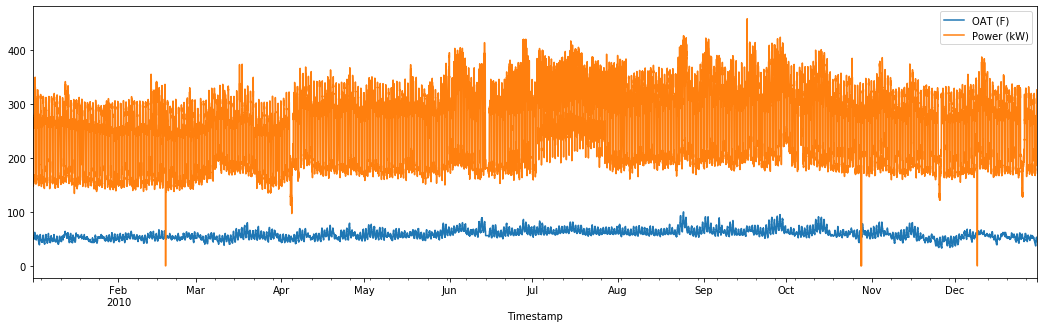

In [10]:
# Let’s first visualize the data by plotting it with pandas.
df.plot(figsize=(18,5))

In [15]:
# Confirm that there are no missing data
df.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27e80ad0>,
      dtype=object)

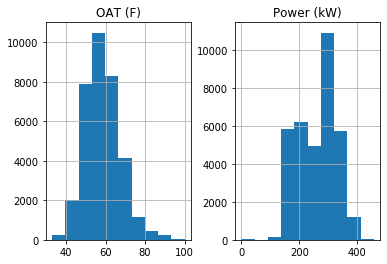

In [16]:
# Check the distribution of the data in each column
df.hist()

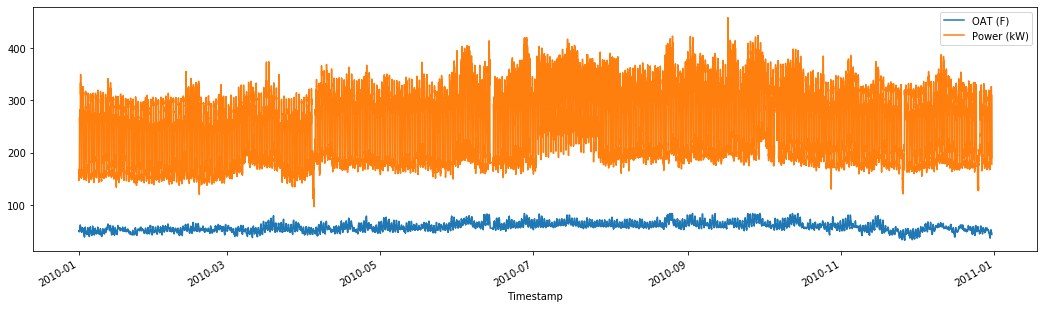

In [17]:
# Drop all values that are greater than 3 standard deviations from the mean 
# and plot the new dataframe.
std_dev = 3
df = df[(np.abs(stats.zscore(df)) < float(std_dev)).all(axis=1)]
df.plot(figsize=(18,5))

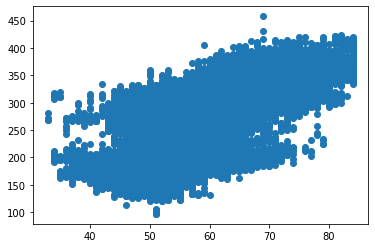

In [51]:
# Checking to see the linear relationship between OAT and Power
plt.scatter(x=df['OAT (F)'],y=df['Power (kW)'])
# This shows how you can designate x and y values for a scatterplot with matplotlib.
# Try playing with this using the scatterplot.py file as a guide.